In [1]:
# importing dependencies
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.metrics import accuracy_score;

In [2]:
# data collection
wine_dataset = pd.read_csv('/content/winequality-red.csv');

wine_dataset.shape

(1599, 12)

In [3]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# checking missing values
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [5]:
# data analysis and visualization
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<ipython-input-14-a34f81452c64>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.catplot(x='quality', data=wine_dataset, kind='count',color='green',hue='quality');


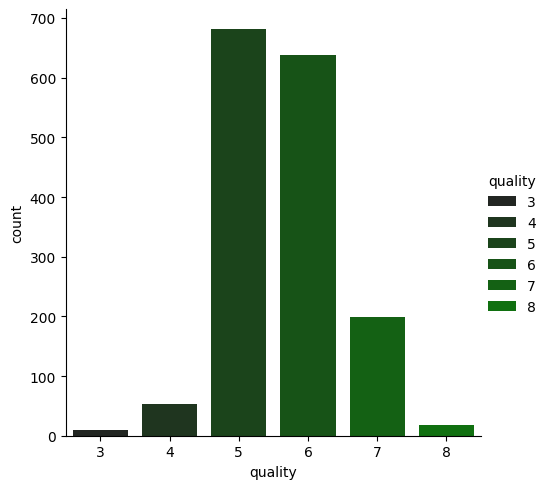

In [14]:
# number of wine for each quality
sns.catplot(x='quality', data=wine_dataset, kind='count',color='green',hue='quality');

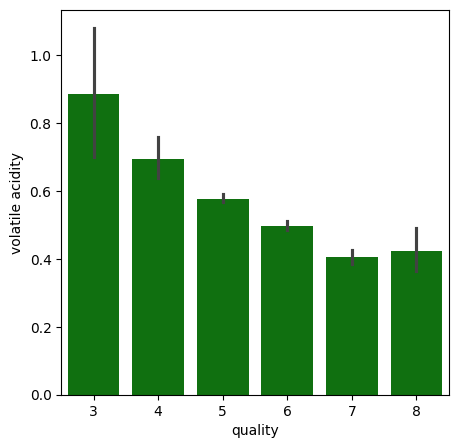

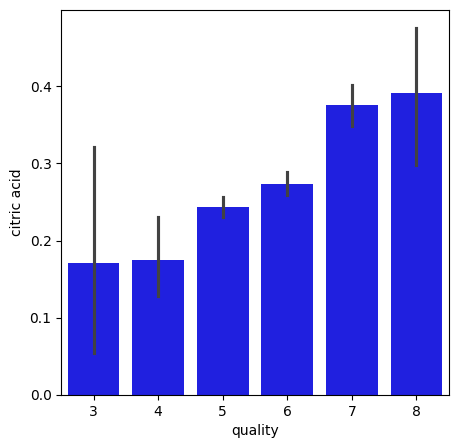

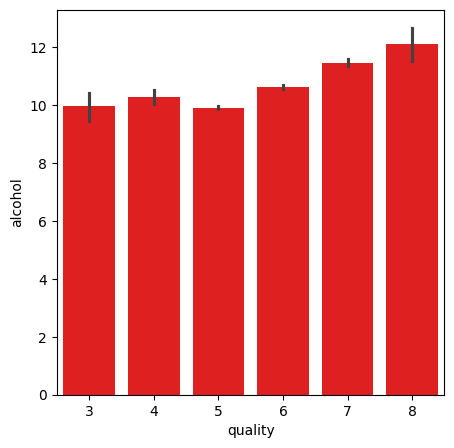

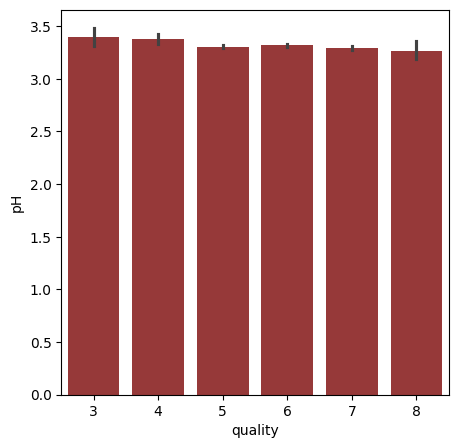

In [20]:
# valatile acidity vs quality
plot = plt.figure(figsize=(5,5));
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset, color="green");
plt.show();

# citric acid vs quality
plot = plt.figure(figsize=(5,5));
sns.barplot(x='quality', y='citric acid', data=wine_dataset, color="blue" );
plt.show();

#alcohol vs Quality
plot = plt.figure(figsize=(5,5));
sns.barplot(x='quality', y='alcohol', data=wine_dataset, color="red");
plt.show();

#pH vs Quality
plot = plt.figure(figsize=(5,5));
sns.barplot(x='quality', y='pH', data=wine_dataset, color="brown");
plt.show();

<Axes: >

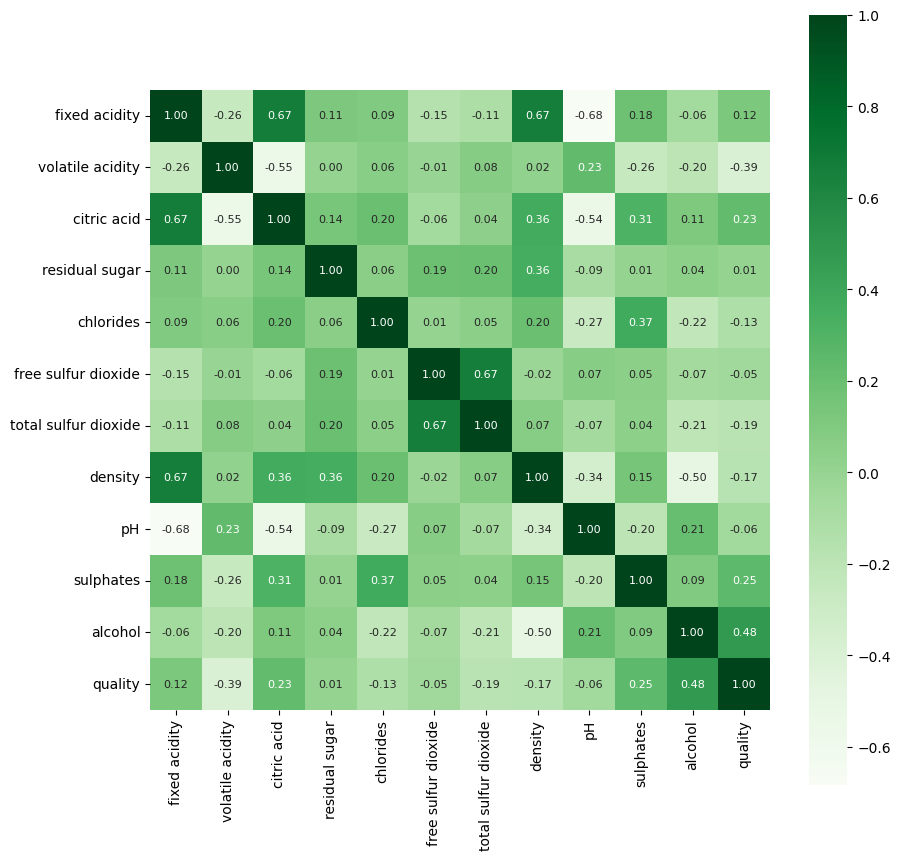

In [30]:
# corelation
correlation = wine_dataset.corr()

# constructing a heatmap to understand the correlation between columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [32]:
# data preprocessing
x = wine_dataset.drop('quality', axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [33]:
# label binarization
y= wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [52]:
# training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
print(y_train)

606     1
362     0
533     0
1397    0
733     0
       ..
789     0
256     0
968     0
952     1
1273    0
Name: quality, Length: 1279, dtype: int64


In [53]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


In [54]:
# Modal training using random forest classifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
# model evaluation
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934375


In [ ]:
# got accuracy of 93%

In [59]:
# building predictive system
input_data =(7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine 🍷🍷🍷!!!')
else:
  print('Bad Quality Wine 👎.')



[0]
Bad Quality Wine 👎.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
